# Titanic Shipwerck Exploratory Analysis

 There are two Data sets: Train and Test

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Datasets from Local Location

In [8]:
train_df = pd.read_csv(r'../Data Files/train.csv')
test_df = pd.read_csv(r'../Data Files/test.csv')

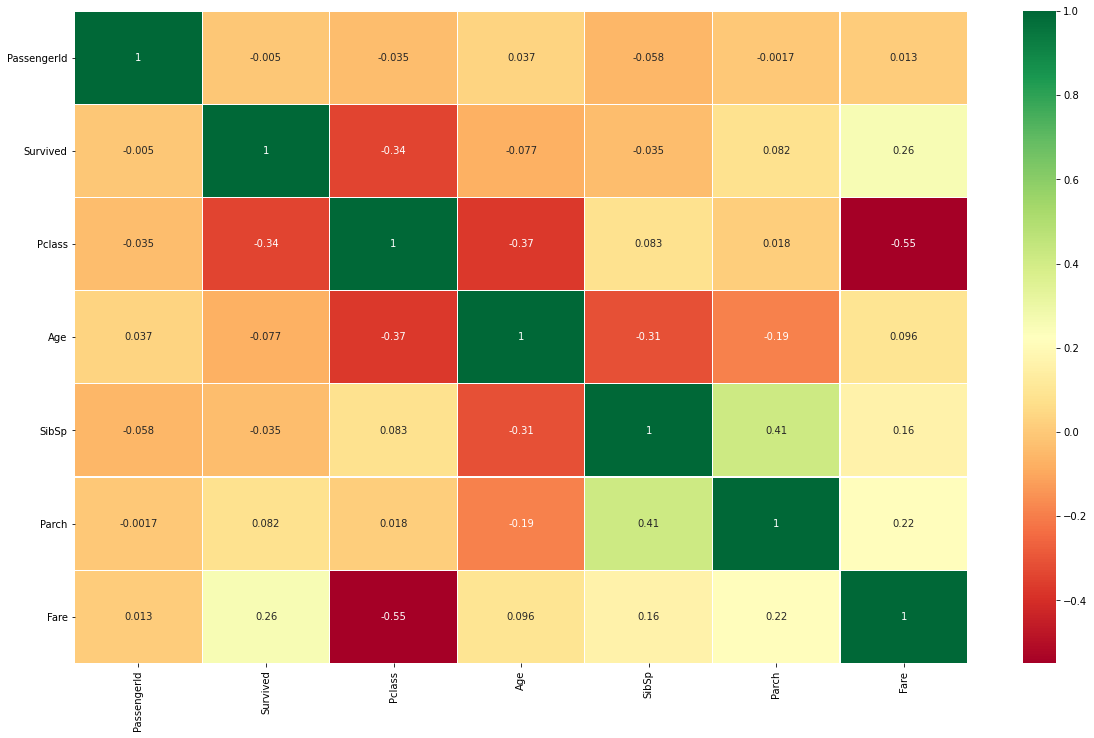

In [9]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

/home/dipesh/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


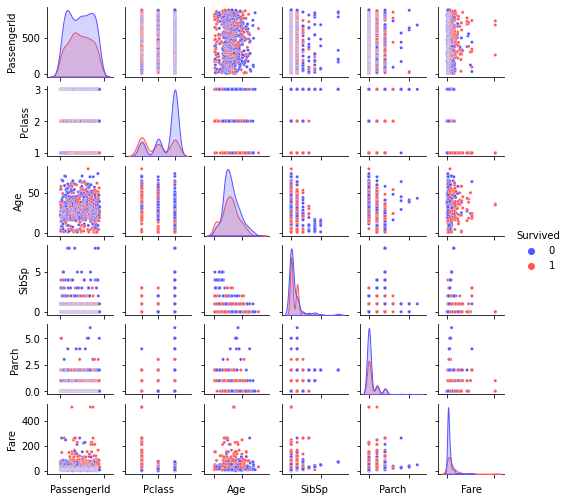

In [10]:
g = sns.pairplot(data=train_df, hue='Survived', palette = 'seismic',
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [4]:
train.head(7)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S

In [5]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# Numerical Variables: 
    PassengerId, Age, Sibsp, Parch, Ticket, Fare, Cabin

# Categorical variables: 
    Survival, Pclass, Sex, Embarked

## Correlation B/w numerical Variables

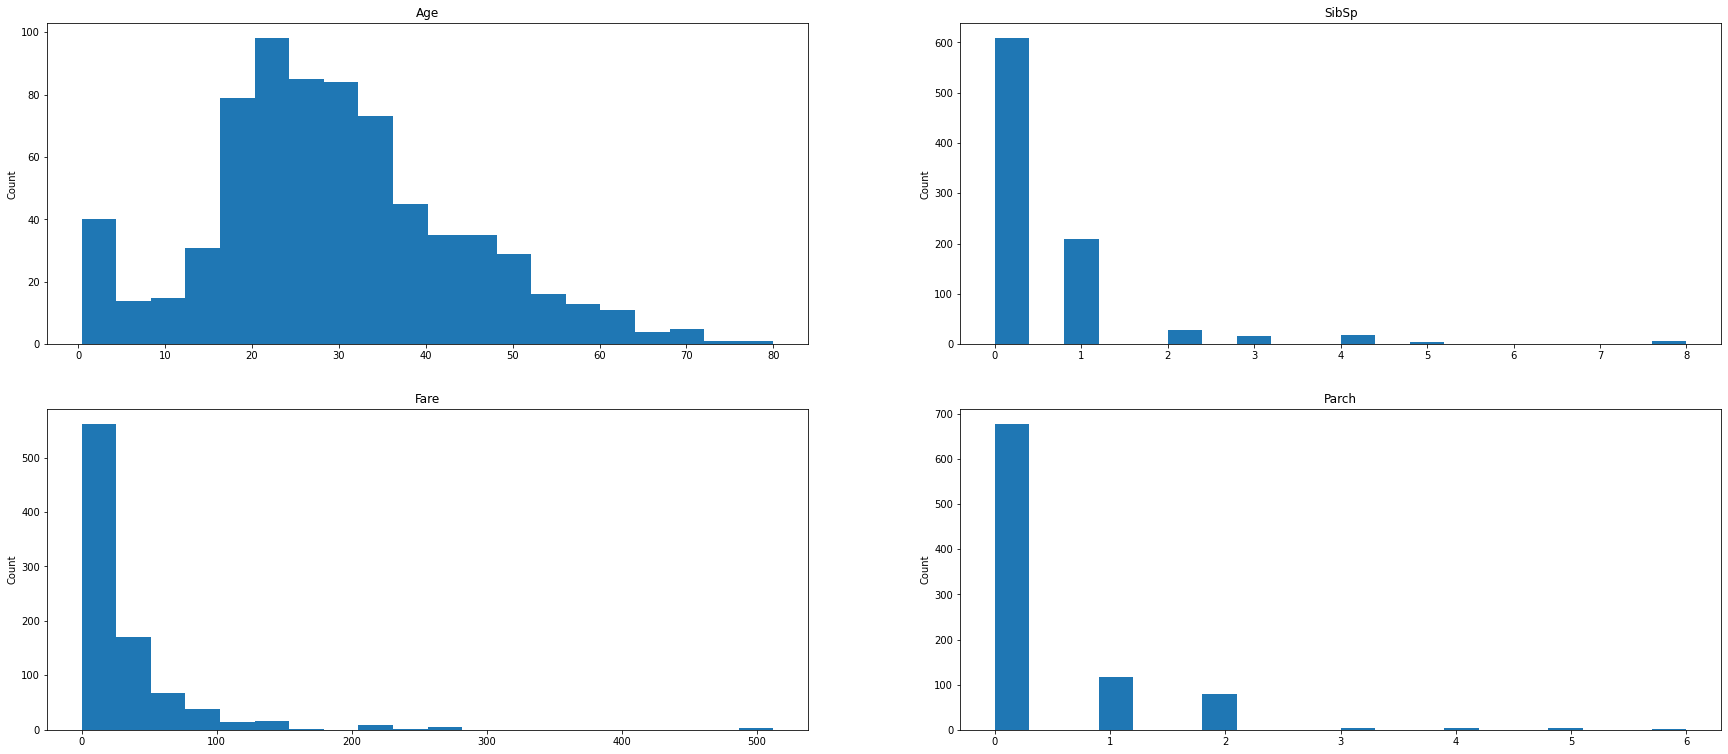

In [6]:
fig,axs=plt.subplots(2,2, figsize=(30,13))

axs[0,0].hist(train['Age'],20)
axs[0,0].set_title('Age')
axs[0,0].set_ylabel('Count')

axs[0,1].hist(train['SibSp'],20)
axs[0,1].set_title('SibSp')
axs[0,1].set_ylabel('Count')

axs[1,1].hist(train['Parch'],20)
axs[1,1].set_title('Parch')
axs[1,1].set_ylabel('Count')

axs[1,0].hist(train['Fare'],20)
axs[1,0].set_title('Fare')
axs[1,0].set_ylabel('Count')

plt.show()

# Outcomes:
    Passenger are mostly 20 to 30 years old
    Most tickets fare was less than 50

##  Relation b/w categorical variables

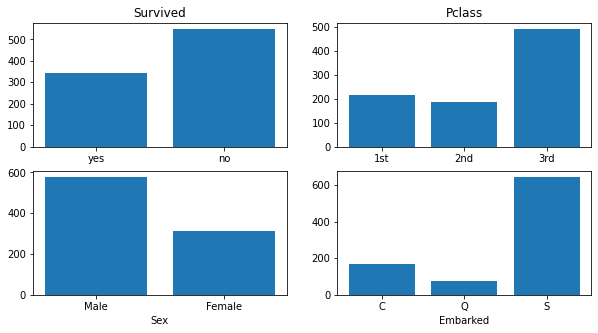

In [7]:
fig,ax1=plt.subplots(2,2, figsize=(10,5))

div1=['yes','no']
val1=[train['Survived'].value_counts()[1],train['Survived'].value_counts()[0]]
ax1[0,0].bar(div1,val1)
ax1[0,0].set_title('Survived')

div2=['1st','2nd','3rd']
val2=[train['Pclass'].value_counts()[1],train['Pclass'].value_counts()[2],train['Pclass'].value_counts()[3]]
ax1[0,1].bar(div2,val2)
ax1[0,1].set_title('Pclass')

div3=['Male','Female']
val3=[train['Sex'].value_counts()['male'],train['Sex'].value_counts()['female']]
ax1[1,0].bar(div3,val3)
ax1[1,0].set_xlabel('Sex')

div4=['C','Q','S']
val4=[train['Embarked'].value_counts()['C'],train['Embarked'].value_counts()['Q'],train['Embarked'].value_counts()['S']]
ax1[1,1].bar(div4,val4)
ax1[1,1].set_xlabel('Embarked')

plt.show()

## Relation b/w Gemder and Survival (Bonus)

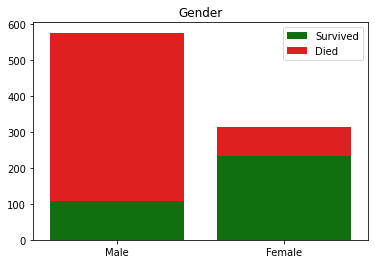

In [19]:
sex_survived=train['Sex'].where(train['Survived']==1).dropna()
div1=['Male','Female']
val1=[sex_survived.value_counts()['male'],sex_survived.value_counts()['female']]
sns.barplot(x=div1,y=val1,label='Survived',color='green')


sex_not_survived=train['Sex'].where(train['Survived']==0).dropna()
val11=[sex_not_survived.value_counts()['male'],sex_not_survived.value_counts()['female']]
sns.barplot(x=div1,y=val11,label='Died',color='red',bottom=val1)

plt.title('Gender')
plt.legend()

In [ ]:
# Passenger Class
pc_survived=train['Pclass'].where(train['Survived']==1).dropna()
div2=['1st','2nd','3rd']
val2=[pc_survived.value_counts()[1],pc_survived.value_counts()[2],pc_survived.value_counts()[3]]
sns.barplot(x=div2,y=val2,label='Survived',color='green')

pc_not_survived=train['Pclass'].where(train['Survived']==0).dropna()
val22=[pc_not_survived.value_counts()[1],pc_not_survived.value_counts()[2],pc_not_survived.value_counts()[3]]
ax2[0,1].bar(div2,val22,label='Died',color='red',bottom=val2)

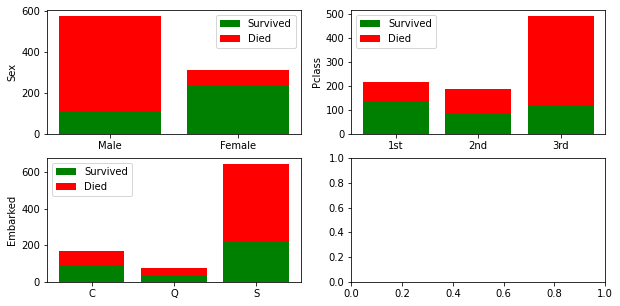

<Figure size 504x360 with 0 Axes>

In [11]:
plt.figure(figsize=(10,5))

# Male and Female
sex_survived=train['Sex'].where(train['Survived']==1).dropna()
div1=['Male','Female']
val1=[sex_survived.value_counts()['male'],sex_survived.value_counts()['female']]
sns.barplot(div1,val1,label='Survived',color='green')

sex_not_survived=train['Sex'].where(train['Survived']==0).dropna()
val11=[sex_not_survived.value_counts()['male'],sex_not_survived.value_counts()['female']]
ax2[0,0].bar(div1,val11,label='Died',color='red',bottom=val1)

ax2[0,0].set_ylabel('Sex')
ax2[0,0].legend()

# Passenger Class
pc_survived=train['Pclass'].where(train['Survived']==1).dropna()
div2=['1st','2nd','3rd']
val2=[pc_survived.value_counts()[1],pc_survived.value_counts()[2],pc_survived.value_counts()[3]]
ax2[0,1].bar(div2,val2,label='Survived',color='green')

pc_not_survived=train['Pclass'].where(train['Survived']==0).dropna()
val22=[pc_not_survived.value_counts()[1],pc_not_survived.value_counts()[2],pc_not_survived.value_counts()[3]]
ax2[0,1].bar(div2,val22,label='Died',color='red',bottom=val2)

ax2[0,1].set_ylabel('Pclass')
ax2[0,1].legend()

# Embarkment
em_survived=train['Embarked'].where(train['Survived']==1).dropna()
div3=['C','Q','S']
val3=[em_survived.value_counts()['C'],em_survived.value_counts()['Q'],em_survived.value_counts()['S']]
ax2[1,0].bar(div3,val3,label='Survived',color='green')

em_not_survived=train['Embarked'].where(train['Survived']==0).dropna()
val33=[em_not_survived.value_counts()['C'],em_not_survived.value_counts()['Q'],em_not_survived.value_counts()['S']]
ax2[1,0].bar(div3,val33,label='Died',color='red',bottom=val3)

ax2[1,0].set_ylabel('Embarked')
ax2[1,0].legend()


plt.figure(figsize=(7,5))
plt.show()

In [9]:
print('Number of Males Survived: ',sex_survived.value_counts()['male'])
print('Number of Females Survived: ',sex_survived.value_counts()['female'])

NameError: name 'sex_survived' is not defined